## Edge-based

Roberts, Prewitt, Sobel and Canny

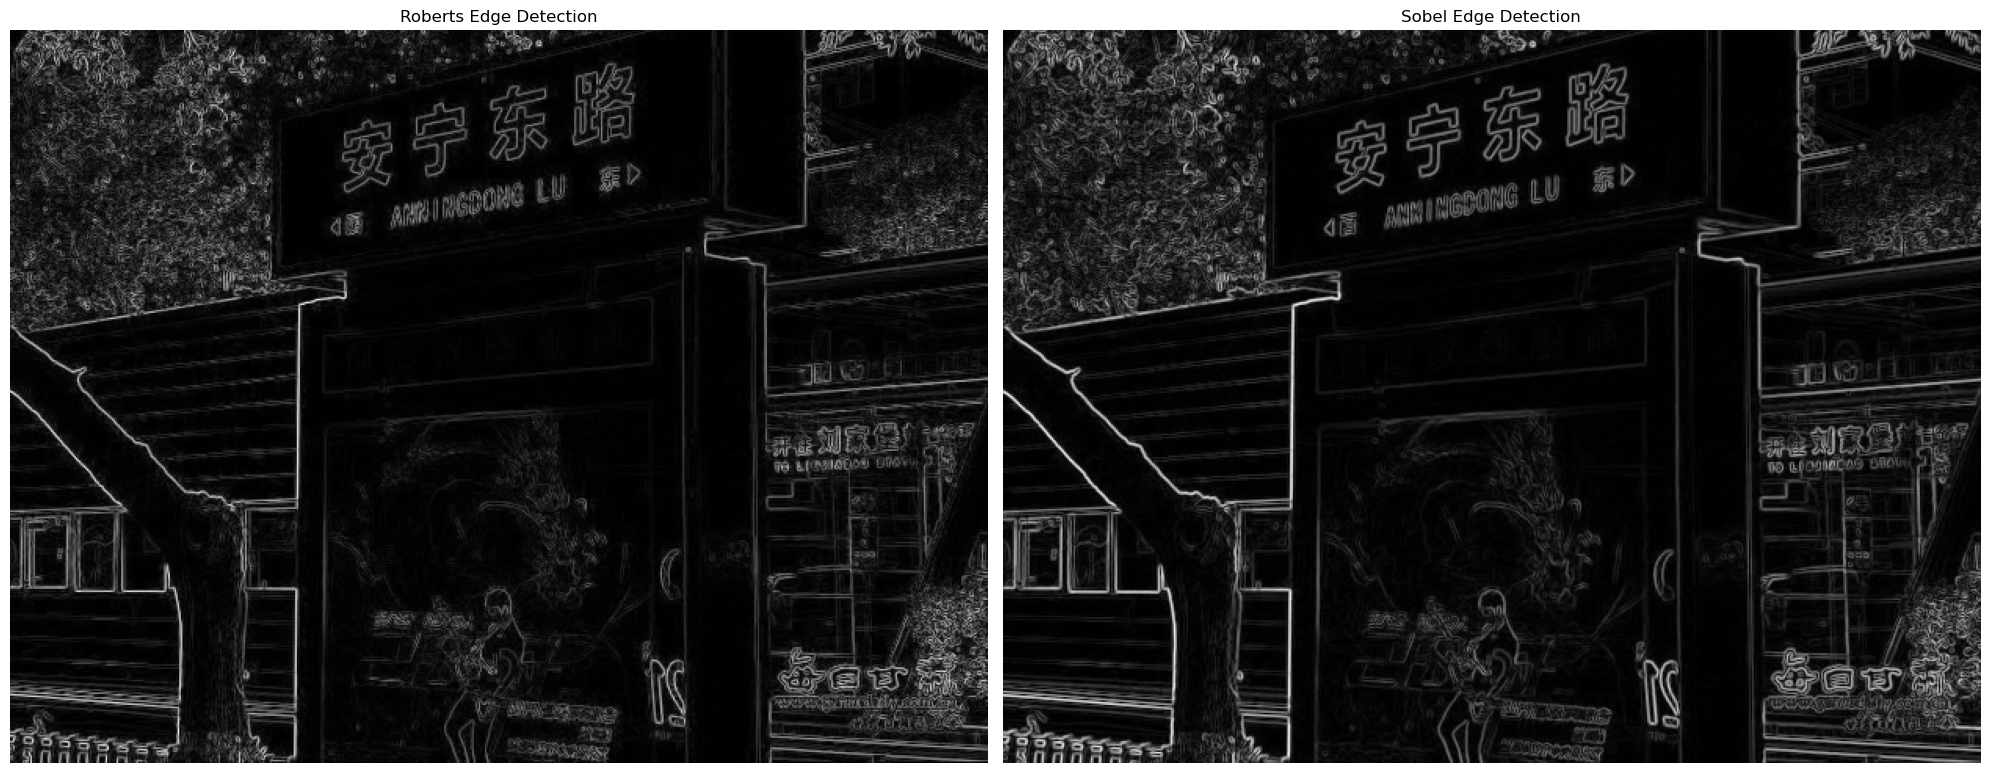

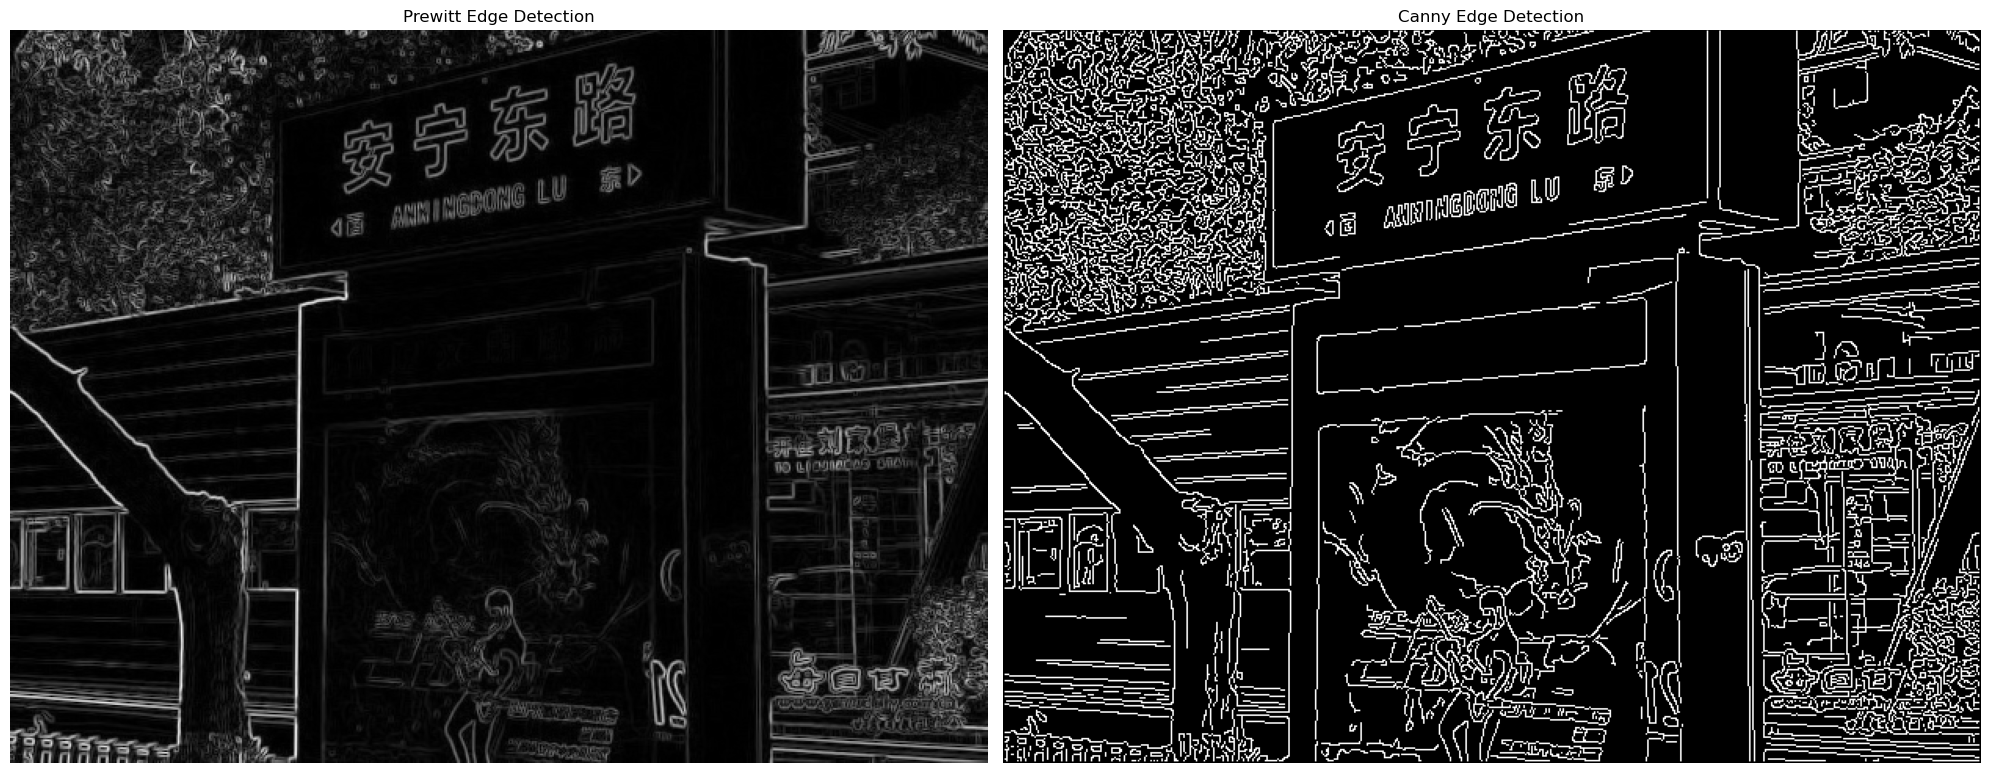

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from skimage.filters import roberts, sobel, prewitt
from skimage import color,io, feature

img = io.imread('./anning.jpg') # 11.jpg 99.jpg  31.jpg 10.jpg
gray = color.rgb2gray(img)

edge_roberts = roberts(gray)
edge_sobel = sobel(gray)
edge_prewitt = prewitt(gray)
edge_canny=feature.canny(gray) # edge_canny=feature.canny(gray,sigma=3,low_threshold=None, high_threshold=None, mask=None, use_quantiles=False)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(20, 20))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()


fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(20, 20))

ax[0].imshow(edge_prewitt, cmap=plt.cm.gray)
ax[0].set_title('Prewitt Edge Detection')

ax[1].imshow(edge_canny, cmap=plt.cm.gray)
ax[1].set_title('Canny Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

Hough detection: line and circle

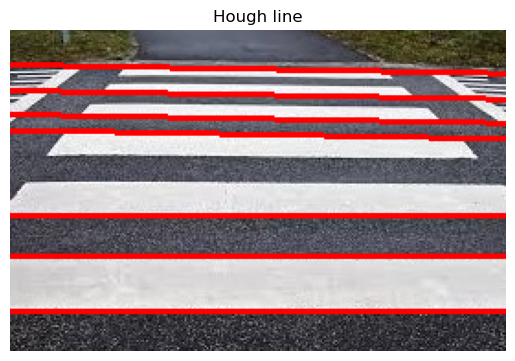

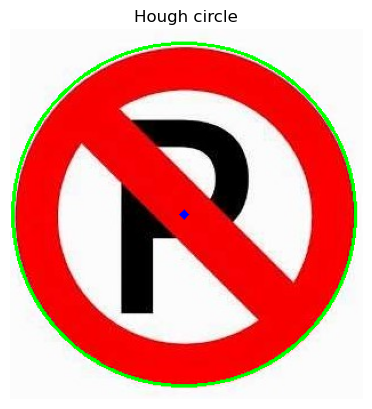

In [5]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

### Hough line detection
img_line = cv2.imread('./92.jpg') # 4.jpg
gray1 = cv2.cvtColor(img_line,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray1,10,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,150)
for line in lines:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 3000*(-b))
        y1 = int(y0 + 3000*(a))
        x2 = int(x0 - 3000*(-b))
        y2 = int(y0 - 3000*(a))
        cv2.line(img_line,(x1,y1),(x2,y2),(0,0,255),2)
#Show
img_line = cv2.cvtColor(img_line,cv2.COLOR_BGR2RGB)
plt.imshow(img_line,cmap=None)
plt.title('Hough line')
plt.axis('off')
plt.show()



### Hough circle detection
img_circle = cv2.imread('./1.jpg')
img_circle_gray = cv2.cvtColor(img_circle,cv2.COLOR_BGR2GRAY)
circles = cv2.HoughCircles(img_circle_gray,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=150,maxRadius=500)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(img_circle,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(img_circle,(i[0],i[1]),2,(255,0,0),3) 
#Show
cimg = cv2.cvtColor(img_circle,cv2.COLOR_BGR2RGB)
plt.imshow(cimg,cmap=None)
plt.title('Hough circle')
plt.axis('off')
plt.show()